In [104]:
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
import sklearn
from sklearn import linear_model, metrics, preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, f1_score
from sklearn.linear_model import LinearRegression,LogisticRegression
import warnings
warnings.filterwarnings("ignore")

In [105]:
df_gas = pd.read_csv('./data/greenhouse gas.csv')
df_gas

,year,CO2_levels,N2O_levels,CH4_levels
0,1984,0.3443,303.9,1654
1,1985,0.3458,304.5,1666
2,1986,0.3472,305.3,1679
3,1987,0.3490,305.9,1691
4,1988,0.3514,306.7,1703
5,1989,0.3530,307.6,1714
6,1990,0.3542,308.6,1724
7,1991,0.3555,309.3,1735
8,1992,0.3562,309.9,1743
9,1993,0.3570,310.1,1746


In [106]:
df_gas['CO2_increase']=0.0
df_gas['N2O_increase']=0.0
df_gas['CH4_increase']=0.0

for i, val in enumerate(df_gas['year']):
#     print(i,val)
    if(i>0):
        if(val==df_gas['year'][i-1]+1):
#             print(df_Crops['CH4_levels'][i],val)
            df_gas['CO2_increase'][i] = (df_gas['CO2_levels'][i-1]/df_gas['CO2_levels'][i])
            df_gas['N2O_increase'][i] = (df_gas['N2O_levels'][i-1]/df_gas['N2O_levels'][i])
            df_gas['CH4_increase'][i] = (df_gas['CH4_levels'][i-1]/df_gas['CH4_levels'][i])           
df_gas

,year,CO2_levels,N2O_levels,CH4_levels,CO2_increase,N2O_increase,CH4_increase
0,1984,0.3443,303.9,1654,0.000000,0.000000,0.000000
1,1985,0.3458,304.5,1666,0.995662,0.998030,0.992797
2,1986,0.3472,305.3,1679,0.995968,0.997380,0.992257
3,1987,0.3490,305.9,1691,0.994842,0.998039,0.992904
4,1988,0.3514,306.7,1703,0.993170,0.997392,0.992954
5,1989,0.3530,307.6,1714,0.995467,0.997074,0.993582
6,1990,0.3542,308.6,1724,0.996612,0.996760,0.994200
7,1991,0.3555,309.3,1735,0.996343,0.997737,0.993660
8,1992,0.3562,309.9,1743,0.998035,0.998064,0.995410
9,1993,0.3570,310.1,1746,0.997759,0.999355,0.998282


In [107]:
df_Crops_Data = pd.read_csv('./data/Gas_Crops_data.csv')
df_Crops_Data

,Domain,Area Code,Area,Element,Item Code,Item,Year,Unit,Value,Flag Description,CO2_levels,N2O_levels,CH4_levels
0,Crops,2,Afghanistan,Production,515,Apples,1961,tonnes,15100.0,Unofficial figure,no rec,no rec,no rec
1,Crops,2,Afghanistan,Production,515,Apples,1962,tonnes,15100.0,FAO estimate,no rec,no rec,no rec
2,Crops,2,Afghanistan,Production,515,Apples,1963,tonnes,15100.0,FAO estimate,no rec,no rec,no rec
3,Crops,2,Afghanistan,Production,515,Apples,1964,tonnes,18400.0,FAO estimate,no rec,no rec,no rec
4,Crops,2,Afghanistan,Production,515,Apples,1965,tonnes,20400.0,FAO estimate,no rec,no rec,no rec
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154805,Crops,181,Zimbabwe,Production,15,Wheat,2015,tonnes,45302.0,Official data,0.4001,328.3,1844
154806,Crops,181,Zimbabwe,Production,15,Wheat,2016,tonnes,42008.0,Official data,0.4033,329.1,1853
154807,Crops,181,Zimbabwe,Production,15,Wheat,2017,tonnes,38715.0,Official data,0.4056,329.9,1860
154808,Crops,181,Zimbabwe,Production,15,Wheat,2018,tonnes,45000.0,FAO estimate,0.4079,331.1,1869


In [108]:
df_Crops_Data['CO2_increase']=0.0
df_Crops_Data['N2O_increase']=0.0
df_Crops_Data['CH4_increase']=0.0

for i, valA in enumerate(df_Crops_Data['Year']):
    for j, valB in enumerate(df_gas['year']):
        if valA == valB:    
            df_Crops_Data['CO2_increase'][i] = df_gas['CO2_increase'][j]
            df_Crops_Data['N2O_increase'][i] = df_gas['N2O_increase'][j]
            df_Crops_Data['CH4_increase'][i] = df_gas['CH4_increase'][j]

df_Crops_Data

,Domain,Area Code,Area,Element,Item Code,Item,Year,Unit,Value,Flag Description,CO2_levels,N2O_levels,CH4_levels,CO2_increase,N2O_increase,CH4_increase
0,Crops,2,Afghanistan,Production,515,Apples,1961,tonnes,15100.0,Unofficial figure,no rec,no rec,no rec,0.000000,0.000000,0.000000
1,Crops,2,Afghanistan,Production,515,Apples,1962,tonnes,15100.0,FAO estimate,no rec,no rec,no rec,0.000000,0.000000,0.000000
2,Crops,2,Afghanistan,Production,515,Apples,1963,tonnes,15100.0,FAO estimate,no rec,no rec,no rec,0.000000,0.000000,0.000000
3,Crops,2,Afghanistan,Production,515,Apples,1964,tonnes,18400.0,FAO estimate,no rec,no rec,no rec,0.000000,0.000000,0.000000
4,Crops,2,Afghanistan,Production,515,Apples,1965,tonnes,20400.0,FAO estimate,no rec,no rec,no rec,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154805,Crops,181,Zimbabwe,Production,15,Wheat,2015,tonnes,45302.0,Official data,0.4001,328.3,1844,0.994001,0.996954,0.994577
154806,Crops,181,Zimbabwe,Production,15,Wheat,2016,tonnes,42008.0,Official data,0.4033,329.1,1853,0.992065,0.997569,0.995143
154807,Crops,181,Zimbabwe,Production,15,Wheat,2017,tonnes,38715.0,Official data,0.4056,329.9,1860,0.994329,0.997575,0.996237
154808,Crops,181,Zimbabwe,Production,15,Wheat,2018,tonnes,45000.0,FAO estimate,0.4079,331.1,1869,0.994361,0.996376,0.995185


In [109]:
df_Crops_Data['crop_increase']=0.0

for i, val in enumerate(df_Crops_Data['Year']):
#     print(i,val)
    if(i>0):
        if(val==df_Crops_Data['Year'][i-1]+1):
            if(df_Crops_Data['Area Code'][i]==df_Crops_Data['Area Code'][i-1]):
                if(df_Crops_Data['Item Code'][i]==df_Crops_Data['Item Code'][i-1]):
#                     print(df_Crops_Data['Year'][i],val,i,df_Crops_Data['Area'][i],df_Crops_Data['Area Code'][i],df_Crops_Data['Area'][i-1],df_Crops_Data['Item'][i],df_Crops_Data['Item Code'][i],df_Crops_Data['Item'][i-1])
                    df_Crops_Data['crop_increase'][i] = (df_Crops_Data['Value'][i-1]/df_Crops_Data['Value'][i])
    
df_Crops_Data

,Domain,Area Code,Area,Element,Item Code,Item,Year,Unit,Value,Flag Description,CO2_levels,N2O_levels,CH4_levels,CO2_increase,N2O_increase,CH4_increase,crop_increase
0,Crops,2,Afghanistan,Production,515,Apples,1961,tonnes,15100.0,Unofficial figure,no rec,no rec,no rec,0.000000,0.000000,0.000000,0.000000
1,Crops,2,Afghanistan,Production,515,Apples,1962,tonnes,15100.0,FAO estimate,no rec,no rec,no rec,0.000000,0.000000,0.000000,1.000000
2,Crops,2,Afghanistan,Production,515,Apples,1963,tonnes,15100.0,FAO estimate,no rec,no rec,no rec,0.000000,0.000000,0.000000,1.000000
3,Crops,2,Afghanistan,Production,515,Apples,1964,tonnes,18400.0,FAO estimate,no rec,no rec,no rec,0.000000,0.000000,0.000000,0.820652
4,Crops,2,Afghanistan,Production,515,Apples,1965,tonnes,20400.0,FAO estimate,no rec,no rec,no rec,0.000000,0.000000,0.000000,0.901961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154805,Crops,181,Zimbabwe,Production,15,Wheat,2015,tonnes,45302.0,Official data,0.4001,328.3,1844,0.994001,0.996954,0.994577,0.882963
154806,Crops,181,Zimbabwe,Production,15,Wheat,2016,tonnes,42008.0,Official data,0.4033,329.1,1853,0.992065,0.997569,0.995143,1.078414
154807,Crops,181,Zimbabwe,Production,15,Wheat,2017,tonnes,38715.0,Official data,0.4056,329.9,1860,0.994329,0.997575,0.996237,1.085057
154808,Crops,181,Zimbabwe,Production,15,Wheat,2018,tonnes,45000.0,FAO estimate,0.4079,331.1,1869,0.994361,0.996376,0.995185,0.860333


In [110]:
df_Crops_Data.columns

Index(['Domain', 'Area Code', 'Area', 'Element', 'Item Code', 'Item', 'Year',
       'Unit', 'Value', 'Flag Description', 'CO2_levels', 'N2O_levels',
       'CH4_levels', 'CO2_increase', 'N2O_increase', 'CH4_increase',
       'crop_increase'],
      dtype='object')

In [111]:
df_Crops_Data.corr()

,Area Code,Item Code,Year,Value,CO2_increase,N2O_increase,CH4_increase,crop_increase
Area Code,1.000000,0.011414,0.034553,0.029687,0.028284,0.028300,0.028350,0.001672
Item Code,0.011414,1.000000,0.030464,-0.126109,0.027945,0.027952,0.027977,-0.001736
Year,0.034553,0.030464,1.000000,0.029191,0.846056,0.846387,0.847065,0.008537
Value,0.029687,-0.126109,0.029191,1.000000,0.022848,0.022860,0.022865,-0.001376
CO2_increase,0.028284,0.027945,0.846056,0.022848,1.000000,0.999998,0.999991,0.007392
N2O_increase,0.028300,0.027952,0.846387,0.022860,0.999998,1.000000,0.999993,0.007390
CH4_increase,0.028350,0.027977,0.847065,0.022865,0.999991,0.999993,1.000000,0.007377
crop_increase,0.001672,-0.001736,0.008537,-0.001376,0.007392,0.007390,0.007377,1.000000


In [125]:
df_Crops_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154810 entries, 0 to 154809
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Domain            154810 non-null  object 
 1   Area Code         154810 non-null  int64  
 2   Area              154810 non-null  object 
 3   Element           154810 non-null  object 
 4   Item Code         154810 non-null  int64  
 5   Item              154810 non-null  object 
 6   Year              154810 non-null  int64  
 7   Unit              154810 non-null  object 
 8   Value             154810 non-null  float64
 9   Flag Description  154810 non-null  object 
 10  CO2_levels        154810 non-null  object 
 11  N2O_levels        154810 non-null  object 
 12  CH4_levels        154810 non-null  object 
 13  CO2_increase      154810 non-null  float64
 14  N2O_increase      154810 non-null  float64
 15  CH4_increase      154810 non-null  float64
 16  crop_increase     15

In [126]:
df_Crops_Data.describe()

,Area Code,Item Code,Year,Value,CO2_increase,N2O_increase,CH4_increase,crop_increase
count,154810.000000,154810.000000,154810.000000,1.548100e+05,154810.000000,154810.000000,154810.000000,1.539310e+05
mean,127.310368,363.761333,1992.136005,1.643241e+06,0.645615,0.647243,0.646622,inf
std,76.701865,217.440583,16.906224,1.334576e+07,0.474915,0.476112,0.475658,NaN
min,1.000000,15.000000,1961.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00
25%,59.000000,122.000000,1978.000000,3.000000e+03,0.000000,0.000000,0.000000,8.858207e-01
50%,121.000000,406.000000,1994.000000,2.993700e+04,0.994329,0.997074,0.994927,9.811321e-01
75%,191.000000,547.000000,2007.000000,2.463982e+05,0.995227,0.997737,0.997228,1.056627e+00
max,351.000000,748.000000,2019.000000,7.685942e+08,0.998035,0.999355,1.000561,inf


In [112]:
df_Crops_Data2=df_Crops_Data.copy()

# Bins 
We will divide the years into bins, every 5 years is one unit 

In [113]:
bins=[1960,1964,1969,1974,1979,1984,1989,1994,1999,2004,2009,2014,2020]
labels =[1,2,3,4,5,6,7,8,9,10,11,12]

In [114]:
df_Crops_Data2["Year_binned"]=pd.cut(df_Crops_Data2["Year"],bins=bins,labels=labels)

<AxesSubplot:ylabel='Year'>

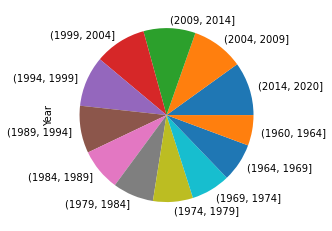

In [115]:
pd.cut(df_Crops_Data2["Year"],bins=bins).value_counts().plot(kind='pie')

(array([ 6576., 11033., 11211., 11439., 11728., 12023., 13197., 14438.,
        14832., 15025., 14940., 18368.]),
 array([1960, 1964, 1969, 1974, 1979, 1984, 1989, 1994, 1999, 2004, 2009,
        2014, 2020]),
 <BarContainer object of 12 artists>)

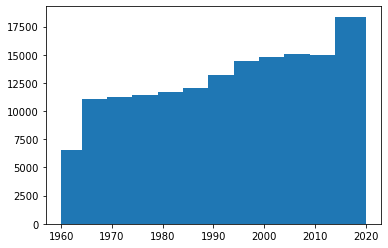

In [116]:
plt.hist(df_Crops_Data2["Year"],bins=bins)

In [117]:
df_Crops_Data2

,Domain,Area Code,Area,Element,Item Code,Item,Year,Unit,Value,Flag Description,CO2_levels,N2O_levels,CH4_levels,CO2_increase,N2O_increase,CH4_increase,crop_increase,Year_binned
0,Crops,2,Afghanistan,Production,515,Apples,1961,tonnes,15100.0,Unofficial figure,no rec,no rec,no rec,0.000000,0.000000,0.000000,0.000000,1
1,Crops,2,Afghanistan,Production,515,Apples,1962,tonnes,15100.0,FAO estimate,no rec,no rec,no rec,0.000000,0.000000,0.000000,1.000000,1
2,Crops,2,Afghanistan,Production,515,Apples,1963,tonnes,15100.0,FAO estimate,no rec,no rec,no rec,0.000000,0.000000,0.000000,1.000000,1
3,Crops,2,Afghanistan,Production,515,Apples,1964,tonnes,18400.0,FAO estimate,no rec,no rec,no rec,0.000000,0.000000,0.000000,0.820652,1
4,Crops,2,Afghanistan,Production,515,Apples,1965,tonnes,20400.0,FAO estimate,no rec,no rec,no rec,0.000000,0.000000,0.000000,0.901961,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154805,Crops,181,Zimbabwe,Production,15,Wheat,2015,tonnes,45302.0,Official data,0.4001,328.3,1844,0.994001,0.996954,0.994577,0.882963,12
154806,Crops,181,Zimbabwe,Production,15,Wheat,2016,tonnes,42008.0,Official data,0.4033,329.1,1853,0.992065,0.997569,0.995143,1.078414,12
154807,Crops,181,Zimbabwe,Production,15,Wheat,2017,tonnes,38715.0,Official data,0.4056,329.9,1860,0.994329,0.997575,0.996237,1.085057,12
154808,Crops,181,Zimbabwe,Production,15,Wheat,2018,tonnes,45000.0,FAO estimate,0.4079,331.1,1869,0.994361,0.996376,0.995185,0.860333,12


In [118]:
Item_dummies=pd.get_dummies(df_Crops_Data2.Item, prefix='Item')
Item_dummies

,Item_Apples,Item_Avocados,Item_Bananas,Item_Blueberries,Item_Cherries,Item_Chestnut,Item_Chick peas,Item_Cinnamon (cannella),"Item_Cocoa, beans",Item_Coconuts,...,"Item_Rice, paddy",Item_Strawberries,Item_Sugar cane,Item_Sunflower seed,Item_Sweet potatoes,Item_Tea,Item_Tomatoes,Item_Vanilla,Item_Watermelons,Item_Wheat
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154805,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
154806,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
154807,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
154808,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [119]:
df_Crops_Data2 = pd.concat([df_Crops_Data2, Item_dummies], axis=1)
df_Crops_Data2

,Domain,Area Code,Area,Element,Item Code,Item,Year,Unit,Value,Flag Description,...,"Item_Rice, paddy",Item_Strawberries,Item_Sugar cane,Item_Sunflower seed,Item_Sweet potatoes,Item_Tea,Item_Tomatoes,Item_Vanilla,Item_Watermelons,Item_Wheat
0,Crops,2,Afghanistan,Production,515,Apples,1961,tonnes,15100.0,Unofficial figure,...,0,0,0,0,0,0,0,0,0,0
1,Crops,2,Afghanistan,Production,515,Apples,1962,tonnes,15100.0,FAO estimate,...,0,0,0,0,0,0,0,0,0,0
2,Crops,2,Afghanistan,Production,515,Apples,1963,tonnes,15100.0,FAO estimate,...,0,0,0,0,0,0,0,0,0,0
3,Crops,2,Afghanistan,Production,515,Apples,1964,tonnes,18400.0,FAO estimate,...,0,0,0,0,0,0,0,0,0,0
4,Crops,2,Afghanistan,Production,515,Apples,1965,tonnes,20400.0,FAO estimate,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154805,Crops,181,Zimbabwe,Production,15,Wheat,2015,tonnes,45302.0,Official data,...,0,0,0,0,0,0,0,0,0,1
154806,Crops,181,Zimbabwe,Production,15,Wheat,2016,tonnes,42008.0,Official data,...,0,0,0,0,0,0,0,0,0,1
154807,Crops,181,Zimbabwe,Production,15,Wheat,2017,tonnes,38715.0,Official data,...,0,0,0,0,0,0,0,0,0,1
154808,Crops,181,Zimbabwe,Production,15,Wheat,2018,tonnes,45000.0,FAO estimate,...,0,0,0,0,0,0,0,0,0,1


In [120]:
df_Crops_Data2.columns

Index(['Domain', 'Area Code', 'Area', 'Element', 'Item Code', 'Item', 'Year',
       'Unit', 'Value', 'Flag Description', 'CO2_levels', 'N2O_levels',
       'CH4_levels', 'CO2_increase', 'N2O_increase', 'CH4_increase',
       'crop_increase', 'Year_binned', 'Item_Apples', 'Item_Avocados',
       'Item_Bananas', 'Item_Blueberries', 'Item_Cherries', 'Item_Chestnut',
       'Item_Chick peas', 'Item_Cinnamon (cannella)', 'Item_Cocoa, beans',
       'Item_Coconuts', 'Item_Coffee, green', 'Item_Cranberries', 'Item_Dates',
       'Item_Eggplants (aubergines)', 'Item_Figs', 'Item_Garlic',
       'Item_Ginger', 'Item_Grapes', 'Item_Kiwi fruit',
       'Item_Lemons and limes', 'Item_Maize', 'Item_Oats', 'Item_Olives',
       'Item_Oranges', 'Item_Pears', 'Item_Peppermint', 'Item_Pineapples',
       'Item_Pistachios', 'Item_Potatoes', 'Item_Raspberries',
       'Item_Rice, paddy', 'Item_Strawberries', 'Item_Sugar cane',
       'Item_Sunflower seed', 'Item_Sweet potatoes', 'Item_Tea',
       'Item

# Machine learning process

Linear Regression


In [121]:
#TRAINING_FEATURES = df_Apples2.columns[df_Apples2.columns != 'Value']
TRAINING_FEATURES= ['CO2_increase', 'N2O_increase','CH4_increase']
X = df_Crops_Data2[TRAINING_FEATURES]
y = df_Crops_Data2['crop_increase']
print(X,y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        CO2_increase  N2O_increase  CH4_increase
0           0.000000      0.000000      0.000000
1           0.000000      0.000000      0.000000
2           0.000000      0.000000      0.000000
3           0.000000      0.000000      0.000000
4           0.000000      0.000000      0.000000
...              ...           ...           ...
154805      0.994001      0.996954      0.994577
154806      0.992065      0.997569      0.995143
154807      0.994329      0.997575      0.996237
154808      0.994361      0.996376      0.995185
154809      0.993666      0.997289      0.995738

[154810 rows x 3 columns] 0         0.000000
1         1.000000
2         1.000000
3         0.820652
4         0.901961
            ...   
154805    0.882963
154806    1.078414
154807    1.085057
154808    0.860333
154809    0.562500
Name: crop_increase, Length: 154810, dtype: float64


In [124]:
# MinMaxScaler(),StandardScaler()
scaler = MinMaxScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# print(y)
model = LinearRegression().fit(X_train_scaled,y_train)
y_pred = model.predict(X_test_scaled)
correct = []
count = -1
resDF = pd.DataFrame({'Actual':y_test, "Predicted": y_pred})
for i in y_test:
    count +=1
    if i == y_pred[count]:
        correct.append(1)
    else:
        correct.append(0)
resDF["correct"] = correct
resDF

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [30]:
#predicted_vals=trained_model.predict(X_test)
#predicted_vals

In [31]:
#evaluate_value=metrics.r2_score(y_test,predicted_vals)
#evaluate_value

NameError: name 'predicted_vals' is not defined

In [ ]:
# print("Initial amount of samples: #{}".format(X.shape[0]))
# print("Number of training samples: #{}".format(X_train.shape[0]))
# print("Number of test samples: #{}".format(X_test.shape[0]))

# print("\nTarget distribution in original dataset:\n{}".format(y.value_counts()))
# print("\nTarget distribution in the training set:\n{}\n".format(y_train.value_counts()))
# print("Target distribution in the test set:\n{}".format(y_test.value_counts()))

In [ ]:
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# clf_model = LogisticRegression().fit(X_train, y_train)
# y_pred = clf_model.predict(X_test)

# resDF = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})

# resDF["correct"] = abs((resDF["Actual"] ^ resDF["Predicted"]) - 1)
# resDF[resDF["correct"] == 1]

In [ ]:
# print("correct %:",len(resDF[resDF["correct"] == 1]) / len(resDF))